<a href="https://colab.research.google.com/gist/qbeer/e52ec7f519dfc2fa12583fa3b497769d/hw12_no_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Word2Vec (something like that) embeddings

* Read the GloVE file into word - vector pairs 
* Create a 2D-embedding with PCA for the 10_000 nearest neighbors (based on L2 distance) for the word 'dog'.
* Visualize the 2 dimensional embeddings on a plot and add text annotations to it
  * 'dog' should be red
  * only add the nearest 50 neighbors
  * add an alpha (.3) to the 10_000 points (too much to visualize well with text)



In [6]:
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import sys
import os
import pathlib
import glob

from sklearn.decomposition import PCA

In [23]:
def get_closest_words(glove_df,vec,k):
    """
    Get the closest k number words for the given vec.
    ---
    INPUT:
        vec: vector of the word
        k: number of closes words
    OUTPUT:
        names: k lenght vector having indices
    """
    dist = np.linalg.norm(glove_df.values - vec, axis=1)   #get the difference
    closests_k = dists.argsort()[:k]                       #i always forget how to do this
    return closests_k

In [7]:
glove_df = pd.read_csv("data/glove.6B.50d.txt",sep=" ", index_col=0, header=None, 
                       quoting=csv.QUOTE_NONE)

In [11]:
display(glove_df.head())
display(glove_df.loc["dog"].values)

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
the,0.418000,0.249680,-0.41242,0.12170,0.34527,-0.044457,-0.49688,-0.17862,-0.00066,-0.656600,...,-0.298710,-0.157490,-0.347580,-0.045637,-0.44251,0.187850,0.002785,-0.184110,-0.115140,-0.78581
",",0.013441,0.236820,-0.16899,0.40951,0.63812,0.477090,-0.42852,-0.55641,-0.36400,-0.239380,...,-0.080262,0.630030,0.321110,-0.467650,0.22786,0.360340,-0.378180,-0.566570,0.044691,0.30392
.,0.151640,0.301770,-0.16763,0.17684,0.31719,0.339730,-0.43478,-0.31086,-0.44999,-0.294860,...,-0.000064,0.068987,0.087939,-0.102850,-0.13931,0.223140,-0.080803,-0.356520,0.016413,0.10216
of,0.708530,0.570880,-0.47160,0.18048,0.54449,0.726030,0.18157,-0.52393,0.10381,-0.175660,...,-0.347270,0.284830,0.075693,-0.062178,-0.38988,0.229020,-0.216170,-0.225620,-0.093918,-0.80375
to,0.680470,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,-0.085253,...,-0.094375,0.018324,0.210480,-0.030880,-0.19722,0.082279,-0.094340,-0.073297,-0.064699,-0.26044


array([ 0.11008  , -0.38781  , -0.57615  , -0.27714  ,  0.70521  ,
        0.53994  , -1.0786   , -0.40146  ,  1.1504   , -0.5678   ,
        0.0038977,  0.52878  ,  0.64561  ,  0.47262  ,  0.48549  ,
       -0.18407  ,  0.1801   ,  0.91397  , -1.1979   , -0.5778   ,
       -0.37985  ,  0.33606  ,  0.772    ,  0.75555  ,  0.45506  ,
       -1.7671   , -1.0503   ,  0.42566  ,  0.41893  , -0.68327  ,
        1.5673   ,  0.27685  , -0.61708  ,  0.64638  , -0.076996 ,
        0.37118  ,  0.1308   , -0.45137  ,  0.25398  , -0.74392  ,
       -0.086199 ,  0.24068  , -0.64819  ,  0.83549  ,  1.2502   ,
       -0.51379  ,  0.04224  , -0.88118  ,  0.7158   ,  0.38519  ])

So it uses the words (okey, comma is no a word) as index. Neat!

In [33]:
#dog and everything....
closest_50 = get_closest_words(glove_df,glove_df.loc["dog"].values,50+1)
closest_10000 = get_closest_words(glove_df,glove_df.loc["dog"].values,10000+1)

names = glove_df.index.values

#PCA
x_n_y = PCA().fit_transform(glove_df.values[closest_10000,:])[:,:2]

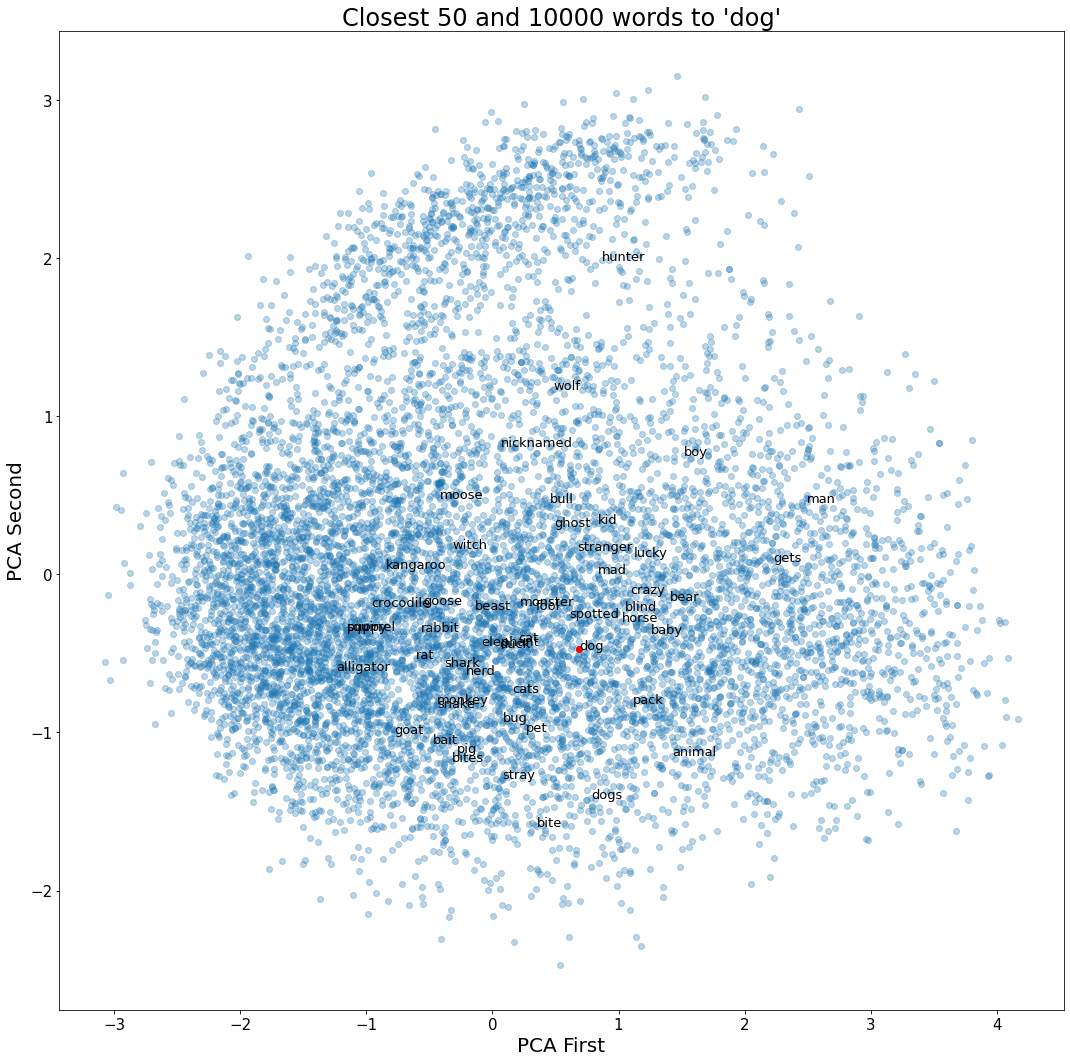

In [40]:
fig,ax = plt.subplots(1,1,figsize=(18,18))
ax.set_title("Closest 50 and 10000 words to 'dog'",fontsize=24)
ax.scatter(x_n_y[:,0],x_n_y[:,1], alpha=.3)
ax.scatter(x_n_y[0,0],x_n_y[0,1], color="red")
for i in range(51):
    ax.annotate(names[closest_50[i]], (x_n_y[i,0],x_n_y[i,1]),fontsize=13)

    
plt.xlabel('PCA First', fontsize=20)
plt.ylabel('PCA Second', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## 2. IMDB reviews with word embeddings

Load the 'imdb_review' dataset from 'tf.keras.datasets.imdb' an convert each sentence into a sequence of its GloVe representations. This will generate (n_samples, sample_length, 50) dimensional dataset. 

  * mean your input along the `sample_length` axis -> this generates a dataset useable to the MLP -> (n_samples, 50)
    * you are basically generating a mean representation of the sentence
  * handle your OOV (out of vocabulary) tokens with e.g. np.zeros(50) -> this does not influence the mean much

Loading the data:

  * `(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=None,
    skip_top=0,
    maxlen=150,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3
)`
  * do the preprocessing this way, this makes the dataset ~9'000 samples large and the maximum length is only 150 words
  * the dataset is represented as index values, so you need to convert twice: index -> word -> GloVe
    * the index-to-word conversion is achievable by Keras, read the documentation

Model defintion:
  * `Dense(256, relu)`,
  * `Dense(64, relu)`,
  * `Dense(1, sigmoid)`

Use default parameters in the compile: 'adam', 'binary_crossentropy', 'accuracy' metric. Train for 20-25 epochs.

***Hint: approximately 55-60% accuracy is achieveable on the test set.***



## 3. Sequence modeling with LSTM

  * use the IMDB dataset again converted into GloVe sequences but without the mean operation. This way you are going to generate (n_samples, sequence_length, 50) sample points with different sequence lengths
  * pad every sequence to `150` in length with np.zeros(50) -> (n_samples, 150, 50)
  * LSTM is a recurrent model with intricate inner operations, if you use it in a bideractional fashion, your sequence will be processed from both ends

Model definition:
  * `BidirectionalLSTM(64, return_sequences=True),`
  * `BidirectionalLSTM(64),`
  * `Dense(64, relu)`,
  * `Dense(1, sigmoid)`

Use default parameters in the compile: 'adam', 'binary_crossentropy', 'accuracy' metric. Train for 20-25 epochs.

***Hint: approximately 65-70% accuracy is achieveable on the test set.***